In [32]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Cohort Analysis

### 1. Dataset Overview

In [33]:
df = pd.read_csv('./data/1/online.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [35]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   70864 non-null  int64         
 1   InvoiceNo    70864 non-null  int64         
 2   StockCode    70864 non-null  object        
 3   Description  70864 non-null  object        
 4   Quantity     70864 non-null  int64         
 5   InvoiceDate  70864 non-null  datetime64[ns]
 6   UnitPrice    70864 non-null  float64       
 7   CustomerID   70864 non-null  int64         
 8   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.9+ MB


In [36]:
df.sample(10)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
33613,151143,549543,21213,PACK OF 72 SKULL CAKE CASES,1,2011-04-10 11:14:00,0.55,18118,United Kingdom
5623,295132,562772,21080,SET/20 RED RETROSPOT PAPER NAPKINS,9,2011-08-09 12:07:00,0.85,13097,United Kingdom
10913,528073,580727,85174,S/4 CACTI CANDLES,1,2011-12-05 17:17:00,10.79,14096,United Kingdom
38283,932,536502,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-01 12:36:00,1.69,16552,United Kingdom
4147,125612,547051,22728,ALARM CLOCK BAKELIKE PINK,4,2011-03-20 12:06:00,3.75,12902,United Kingdom
17732,452196,575325,23202,JUMBO BAG VINTAGE LEAF,2,2011-11-09 13:46:00,2.08,17293,United Kingdom
24976,467539,576354,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,120,2011-11-14 16:17:00,2.55,13881,United Kingdom
58913,273185,560782,22192,BLUE DINER WALL CLOCK,2,2011-07-21 10:10:00,8.50,14769,United Kingdom
45917,110725,545695,84378,SET OF 3 HEART COOKIE CUTTERS,6,2011-03-06 14:15:00,1.25,17050,United Kingdom
24382,498956,578548,21742,LARGE ROUND WICKER PLATTER,2,2011-11-24 15:02:00,5.95,17345,United Kingdom


In [37]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,70864.000000,70864.000000
mean,11.511233,3.063033
std,41.017582,31.894970
min,1.000000,0.001000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,4300.000000,8142.750000


### 2. Assigning acquisition month cohort 

In [38]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [39]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

In [40]:
grouping = df.groupby('CustomerID')['InvoiceMonth']

In [41]:
df['CohortMonth'] = grouping.transform('min')

In [42]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


### 3. Extracting integer values from data

In [43]:
def get_date_int(dataframe, column):
    year = dataframe[column].dt.year
    month = dataframe[column].dt.month
    day = dataframe[column].dt.day
    return year, month, day

### 4. Assigning time offset value

In [44]:
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')

In [45]:
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [46]:
difference_years = invoice_year - cohort_year

In [47]:
difference_months = invoice_month - cohort_month

In [48]:
df['CohortIndex'] = difference_years * 12 + difference_months + 1
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


### 5. Counting monthly active customers from each cohort

In [49]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

In [50]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

In [51]:
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 6. Calculating & visualizing retention rate

In [52]:
cohort_sizes = cohort_counts.iloc[:,0]

In [53]:
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [54]:
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


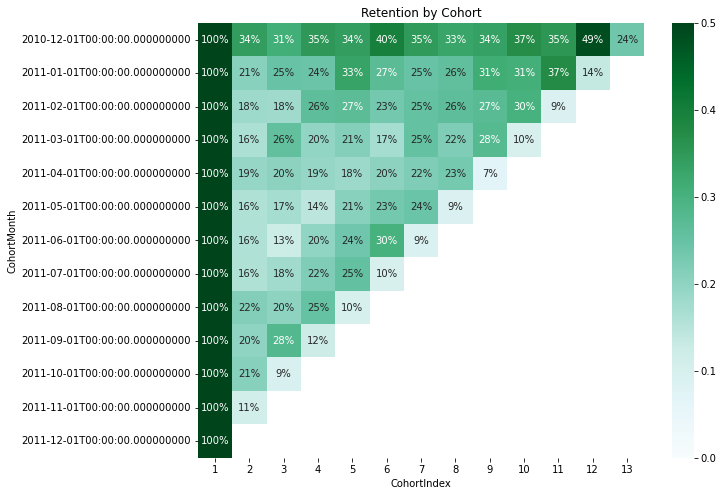

In [55]:
plt.figure(figsize=(10,8))
plt.title('Retention by Cohort')
sns.heatmap(data=retention, 
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap='BuGn')
plt.show()

### 7. Calculating Mean quantity for each cohort

In [56]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

In [57]:
cohort_data = grouping['Quantity'].mean()

In [58]:
cohort_data = cohort_data.reset_index()

In [59]:
avg_quantity = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='Quantity')
avg_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


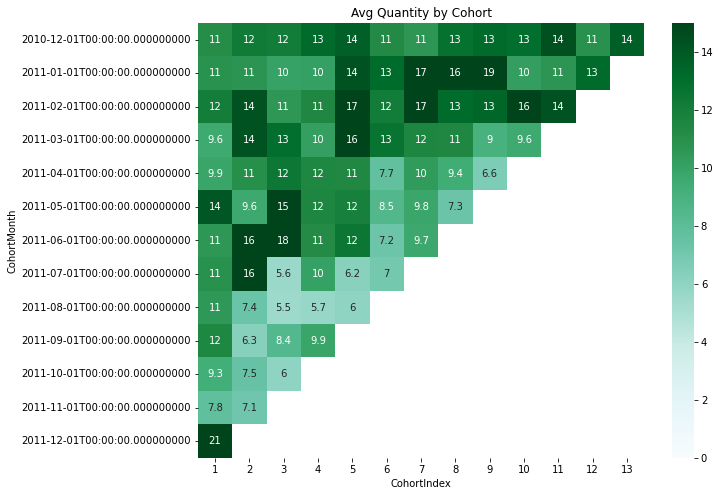

In [60]:
plt.figure(figsize=(10,8))
plt.title('Avg Quantity by Cohort')
sns.heatmap(data=avg_quantity, 
           annot=True,
           #fmt='.0%',
           vmin=0,
           vmax=15,
           cmap='BuGn')
plt.show()